## <center>Geometric Brownian Motion (GBM)<center>

The dynamics of the model are described by the following SDE:

$$
dp = \mu p dt + \sigma p dW(t)
$$

where $W(t)$ is simple Brownian motion and is distributed $W(t) \sim N(0, \sigma^2 t)$.

This is simulated using forward Euler as follows:

$$
p_{t+1} = p_t + \mu p_t \Delta t + \sigma p_t \sqrt{\Delta t} Z
$$

where $Z \sim N(0, 1)$.

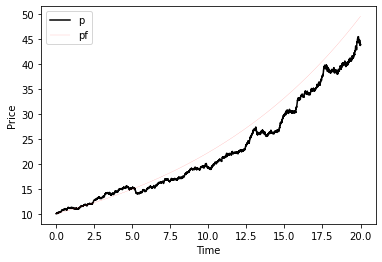

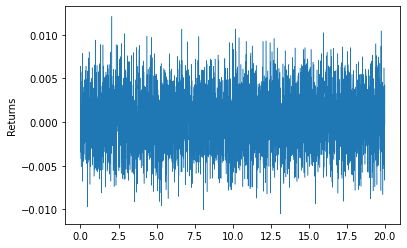

In [1]:
from pylab import *

mu = 0.08
sigma = 0.05

T = 20.0
Dt = 1/252   # 252 trading days in year


def initialize():
    global p, t, pvec, tvec, pf, pfvec
    p = 10.0
    t = 0.
    pvec = [p]
    tvec = [t]
    
    # no noise exponential growth, just for comparison
    pf = p
    pfvec = [pf]


def observe():
    global p, t, pvec, tvec, pf, pfvec
    pvec.append(p)
    tvec.append(t)
    pfvec.append(pf)


def update():
    global p, t, pvec, tvec, pf, pfvec
    np = p + mu*p*Dt + sigma*p*sqrt(Dt)*normal()
    t = t + Dt
    npf = pf + mu*pf*Dt
    p, pf = np, npf

initialize()
while t < T:
    update()
    observe()

plot(tvec, pvec, 'k',label='p')
plot(tvec, pfvec, 'r', label='pf', linewidth=0.1)
xlabel('Time')
ylabel('Price')
legend()
show()

plot(tvec[1:], diff(log(pvec)), linewidth=0.5)
ylabel('Returns')
show()
